In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
from qubit_templates import *
from functions import *

# Read configuration file

In [ ]:
outname = "FeedLine_Qubit"

config = load_config( f"config/FeedLine_Qubit.yaml" )

# Launch pad

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


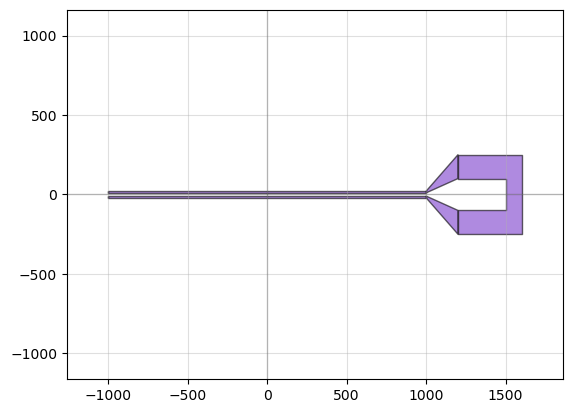

In [4]:
chipdesign = Device('chipdesign')
FL = device_FeedLine(config)
chipdesign.add_ref(FL.device)
qp(chipdesign)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


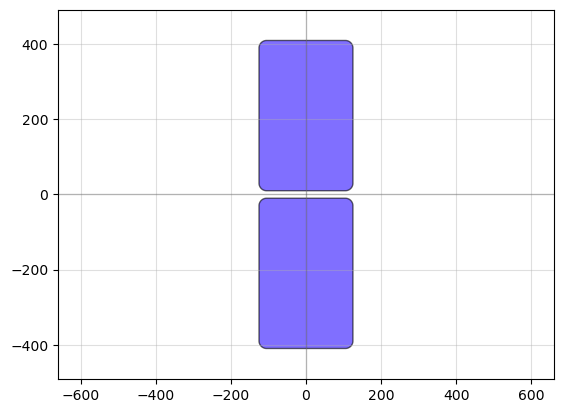

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


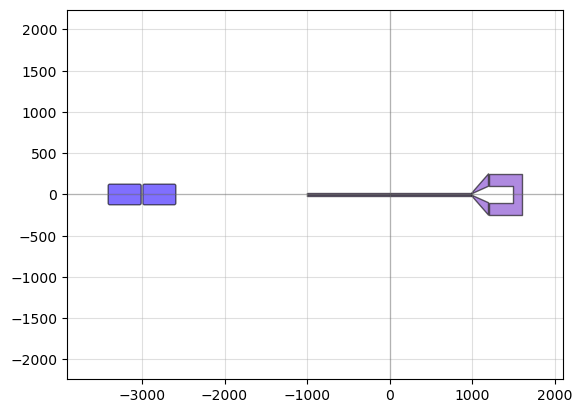

In [ ]:
Qubit = device_Pad(config)
qp(Qubit.metal)
Qubit.rotate(90)
Qubit.x = FL.xmin - config["FeedLine_Qubit_distance"]
chipdesign.add_ref(Qubit.metal)
qp(chipdesign)

## Make inverted design for Qiskit-metal

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


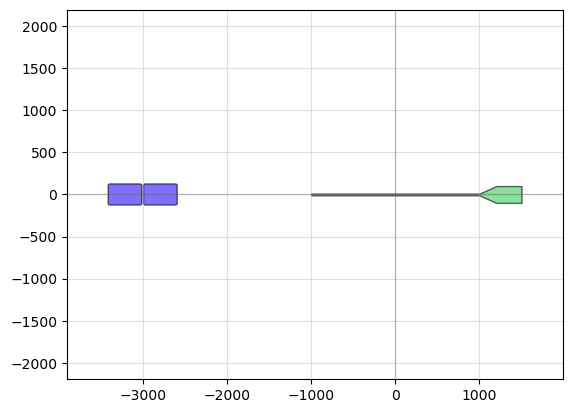

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


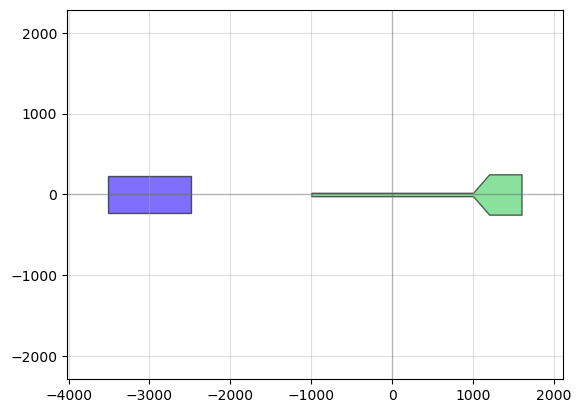

{'FeedLine': {'layer': 0, 'ports': {'LaunchPad0': {'start': [1600.0, -100.0], 'end': [1600.0, 100.0], 'width': 200.0, 'gap': 100.0}}}, 'Qubit': {'layer': 1, 'ports': {'LaunchPad0': {'start': [-2990.5, -10.0], 'end': [-2990.5, 10.0], 'width': 20.0, 'gap': 20.0}}}}


In [6]:

device_list = [
    dict(device = FL, name = "FeedLine"),
    dict(device = Qubit, name = "Qubit")
]

phidl_to_metal(
    device_list = device_list, 
    outname = outname
)